# Estimating Temperature Changes from Greenhouse Gases 

In [480]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Load and explore CO2 and temperature data

In [3]:
df = pd.read_csv('Downloads/GHG Input Data - Coalesced.csv')

In [4]:
df.head(n=10)

,t,Year,CO2,Temperature
0,0,-422382,268.3,NaN
1,568,-421814,267.7,NaN
2,1616,-420766,NaN,0.23
3,1683,-420699,270.6,NaN
4,2247,-420135,NaN,0.08
5,2258,-420124,266.4,NaN
6,2848,-419534,268.6,NaN
7,2875,-419507,NaN,0.15
8,3494,-418888,NaN,0.32
9,3982,-418400,273.8,NaN


In [5]:
# Separate dataframes to plot without null values

co2_df = df.dropna(subset=['CO2'])
temp_df = df.dropna(subset=['Temperature'])

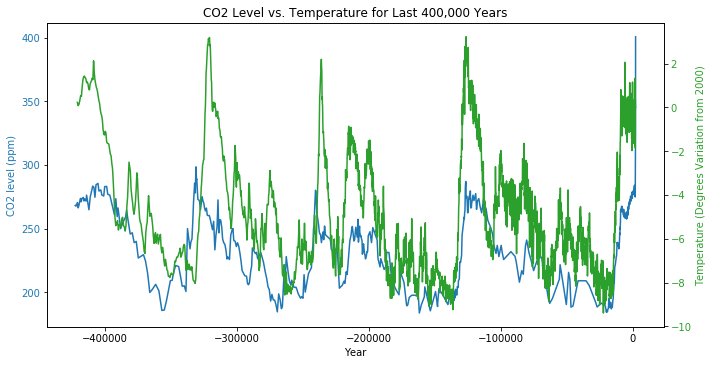

In [6]:
# Generate plot for CO2 & temperature variation over time

fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 level (ppm)', color=color)
ax1.plot(co2_df['Year'], co2_df['CO2'], color=color) 
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('Temperature (Degrees Variation from 2000)', color=color) 
ax2.plot(temp_df['Year'], temp_df['Temperature'], color=color) 
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('CO2 Level vs. Temperature for Last 400,000 Years')
plt.show()

In [7]:
# Calculate correlation between CO2 and temp

print df[['CO2', 'Temperature']].corr()

                  CO2  Temperature
CO2          1.000000     0.803362
Temperature  0.803362     1.000000


In [8]:
# Correlation is 0.80 - strong linear relationship

### Missing data imputation

In [9]:
# Need to impute both missing t values as well as missing CO2 & temperature values 

In [10]:
missing_t = []

for i in range(df['t'].max()):
    if i not in df['t'].values:
        missing_t.append([i, None, None, None])

In [11]:
len(missing_t)

420292

In [12]:
missing_t

[[1, None, None, None],
 [2, None, None, None],
 [3, None, None, None],
 [4, None, None, None],
 [5, None, None, None],
 [6, None, None, None],
 [7, None, None, None],
 [8, None, None, None],
 [9, None, None, None],
 [10, None, None, None],
 [11, None, None, None],
 [12, None, None, None],
 [13, None, None, None],
 [14, None, None, None],
 [15, None, None, None],
 [16, None, None, None],
 [17, None, None, None],
 [18, None, None, None],
 [19, None, None, None],
 [20, None, None, None],
 [21, None, None, None],
 [22, None, None, None],
 [23, None, None, None],
 [24, None, None, None],
 [25, None, None, None],
 [26, None, None, None],
 [27, None, None, None],
 [28, None, None, None],
 [29, None, None, None],
 [30, None, None, None],
 [31, None, None, None],
 [32, None, None, None],
 [33, None, None, None],
 [34, None, None, None],
 [35, None, None, None],
 [36, None, None, None],
 [37, None, None, None],
 [38, None, None, None],
 [39, None, None, None],
 [40, None, None, None],
 [41, Non

In [13]:
pd.DataFrame(missing_t, columns=df.columns)

,t,Year,CO2,Temperature
0,1,None,None,None
1,2,None,None,None
2,3,None,None,None
3,4,None,None,None
4,5,None,None,None
5,6,None,None,None
6,7,None,None,None
7,8,None,None,None
8,9,None,None,None
9,10,None,None,None


In [14]:
df = df.append(pd.DataFrame(missing_t, columns=df.columns), ignore_index=True)

In [15]:
df = df.sort_values(by='t').reset_index()

In [16]:
df

,index,t,Year,CO2,Temperature
0,0,0,-422382,268.300000,NaN
1,4106,1,None,NaN,NaN
2,4107,2,None,NaN,NaN
3,4108,3,None,NaN,NaN
4,4109,4,None,NaN,NaN
5,4110,5,None,NaN,NaN
6,4111,6,None,NaN,NaN
7,4112,7,None,NaN,NaN
8,4113,8,None,NaN,NaN
9,4114,9,None,NaN,NaN


In [17]:
df = df.drop(['index'], axis=1)

In [18]:
df.head()

,t,Year,CO2,Temperature
0,0,-422382,268.3,NaN
1,1,None,NaN,NaN
2,2,None,NaN,NaN
3,3,None,NaN,NaN
4,4,None,NaN,NaN


In [19]:
df['Year'] = pd.to_numeric(df['Year'])

In [20]:
df['int_year'] = df['Year'].interpolate()
df['int_CO2'] = df['CO2'].interpolate()
df['int_temp'] = df['Temperature'].interpolate()

In [77]:
df.head(n=20)

,t,Year,CO2,Temperature,int_year,int_CO2,int_temp
1616,1616,-420766.0,NaN,0.23,-420766.0,270.425740,0.230000
1617,1617,NaN,NaN,NaN,-420765.0,270.428341,0.229762
1618,1618,NaN,NaN,NaN,-420764.0,270.430942,0.229525
1619,1619,NaN,NaN,NaN,-420763.0,270.433543,0.229287
1620,1620,NaN,NaN,NaN,-420762.0,270.436143,0.229049
1621,1621,NaN,NaN,NaN,-420761.0,270.438744,0.228811
1622,1622,NaN,NaN,NaN,-420760.0,270.441345,0.228574
1623,1623,NaN,NaN,NaN,-420759.0,270.443946,0.228336
1624,1624,NaN,NaN,NaN,-420758.0,270.446547,0.228098
1625,1625,NaN,NaN,NaN,-420757.0,270.449148,0.227861


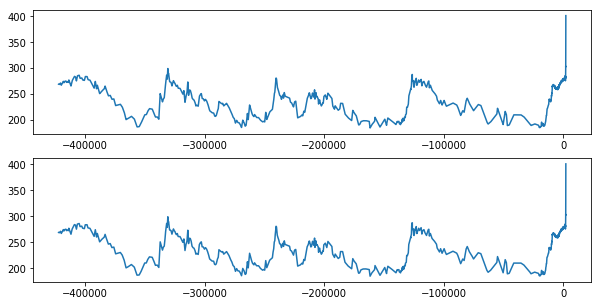

In [22]:
fig, axs = plt.subplots(2, 1, figsize=(10,5))
axs[0].plot(df['int_year'], df['int_CO2'])
axs[1].plot(co2_df['Year'], co2_df['CO2'])
plt.show()

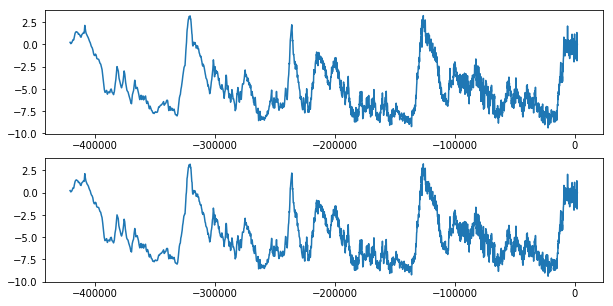

In [23]:
fig, axs = plt.subplots(2, 1, figsize=(10,5))
axs[0].plot(df['int_year'], df['int_temp'])
axs[1].plot(temp_df['Year'], temp_df['Temperature'])
plt.show()

In [78]:
df.head(n=20)

,t,Year,CO2,Temperature,int_year,int_CO2,int_temp
1616,1616,-420766.0,NaN,0.23,-420766.0,270.425740,0.230000
1617,1617,NaN,NaN,NaN,-420765.0,270.428341,0.229762
1618,1618,NaN,NaN,NaN,-420764.0,270.430942,0.229525
1619,1619,NaN,NaN,NaN,-420763.0,270.433543,0.229287
1620,1620,NaN,NaN,NaN,-420762.0,270.436143,0.229049
1621,1621,NaN,NaN,NaN,-420761.0,270.438744,0.228811
1622,1622,NaN,NaN,NaN,-420760.0,270.441345,0.228574
1623,1623,NaN,NaN,NaN,-420759.0,270.443946,0.228336
1624,1624,NaN,NaN,NaN,-420758.0,270.446547,0.228098
1625,1625,NaN,NaN,NaN,-420757.0,270.449148,0.227861


In [25]:
# Let's cut out the first rows where we have no temperature readings

In [26]:
df = df[df['int_temp'].notnull()]

In [27]:
len(df)

422782

In [28]:
df.head()

,t,Year,CO2,Temperature,int_year,int_CO2,int_temp
1616,1616,-420766.0,NaN,0.23,-420766.0,270.425740,0.230000
1617,1617,NaN,NaN,NaN,-420765.0,270.428341,0.229762
1618,1618,NaN,NaN,NaN,-420764.0,270.430942,0.229525
1619,1619,NaN,NaN,NaN,-420763.0,270.433543,0.229287
1620,1620,NaN,NaN,NaN,-420762.0,270.436143,0.229049


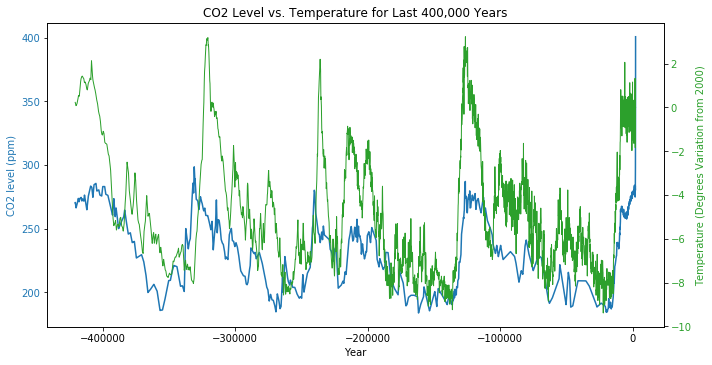

In [29]:
# Generate plot for CO2 & temperature variation over time again

fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 level (ppm)', color=color)
ax1.plot(df['int_year'], df['int_CO2'], color=color) 
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('Temperature (Degrees Variation from 2000)', color=color) 
ax2.plot(df['int_year'], df['int_temp'], color=color, linewidth=1) 
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('CO2 Level vs. Temperature for Last 400,000 Years')
plt.show()

In [30]:
post_ir_df = df[df['int_year'] > -100000]

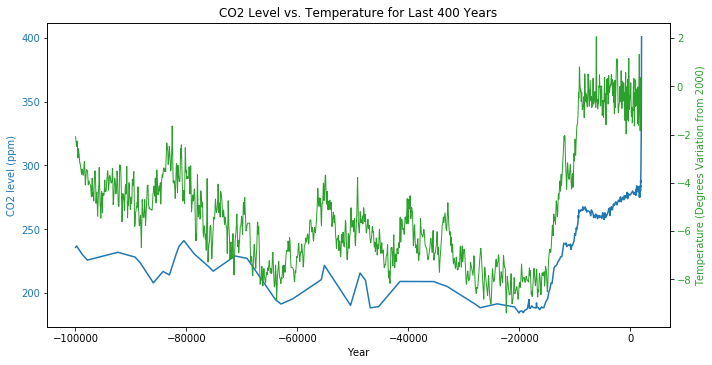

In [31]:
# Generate plot for CO2 & temperature variation over time again

fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 level (ppm)', color=color)
ax1.plot(post_ir_df['int_year'], post_ir_df['int_CO2'], color=color) 
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('Temperature (Degrees Variation from 2000)', color=color) 
ax2.plot(post_ir_df['int_year'], post_ir_df['int_temp'], color=color, linewidth=1) 
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('CO2 Level vs. Temperature for Last 400 Years')
plt.show()

In [32]:
# We need some updated temperature data - so for estimating transfer function let's cut out preindustrial data

In [33]:
pre_civ_df = df[df['int_year'] < -20000]

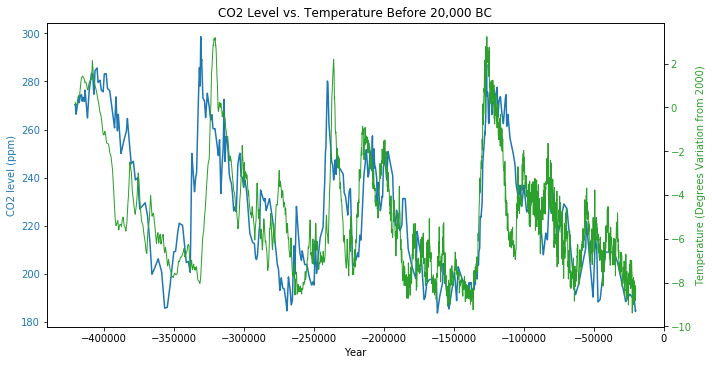

In [34]:
# Generate plot for CO2 & temperature variation over time again

fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 level (ppm)', color=color)
ax1.plot(pre_civ_df['int_year'], pre_civ_df['int_CO2'], color=color) 
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('Temperature (Degrees Variation from 2000)', color=color) 
ax2.plot(pre_civ_df['int_year'], pre_civ_df['int_temp'], color=color, linewidth=1) 
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('CO2 Level vs. Temperature Before 20,000 BC')
plt.show()

In [35]:
pre_civ_df[['int_CO2', 'int_temp']].corr()

,int_CO2,int_temp
int_CO2,1.000000,0.725745
int_temp,0.725745,1.000000


# Attempting Fourier transforms (these ended up being implemented in MATLAB, below are failed prototyping efforts)

In [42]:
from scipy.fftpack import fft, fftfreq

In [37]:
f_CO2 = fft(pre_civ_df['int_CO2'])
f_temp = fft(pre_civ_df['int_temp'])

In [50]:
n = pre_civ_df['int_CO2'].size

In [51]:
co2_freq = fftfreq(n, d=1)

In [52]:
co2_freq_df = pd.DataFrame(zip(co2_freq, f_CO2))

In [53]:
co2_freq_df.head()

,0,1
0,0.000000,(90860290.9702+0j)
1,0.000002,(1251518.95223-1144198.16439j)
2,0.000005,(-140200.083282-732882.646765j)
3,0.000007,(-971593.693006-1579826.71697j)
4,0.000010,(3836935.46129-3563013.12258j)


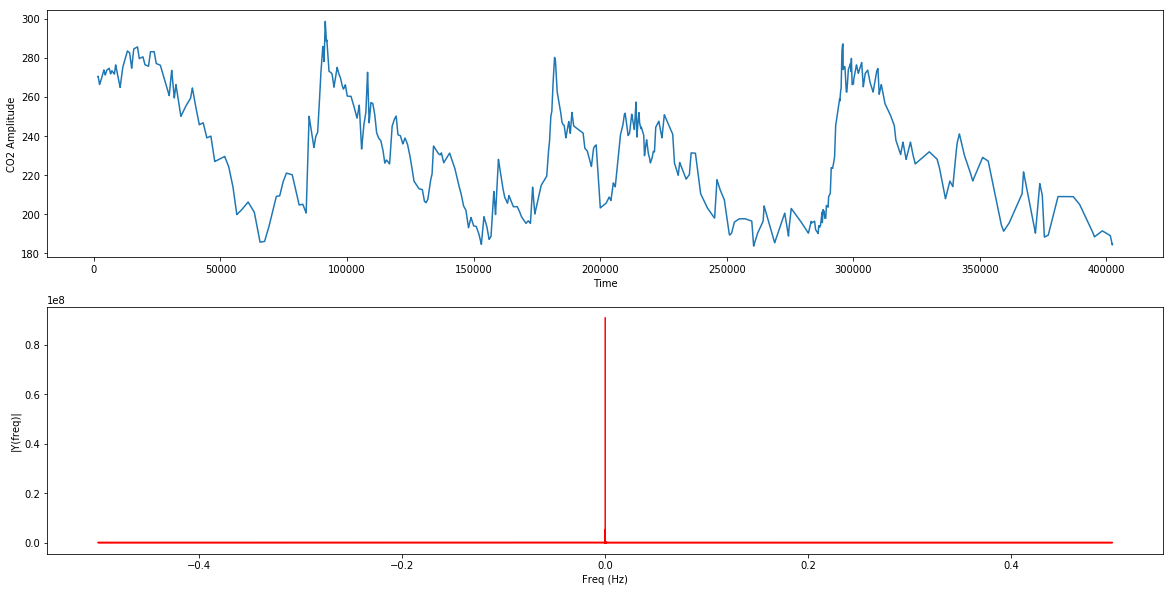

In [75]:
fig, ax = plt.subplots(2, 1, figsize=(20,10))
ax[0].plot(pre_civ_df['t'],pre_civ_df['int_CO2'])
ax[0].set_xlabel('Time')
ax[0].set_ylabel('CO2 Amplitude')
ax[1].plot(co2_freq,abs(f_CO2),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')

In [58]:
n = pre_civ_df['int_temp'].size

In [59]:
temp_freq = fftfreq(n, d=1)

In [60]:
temp_freq_df = pd.DataFrame(zip(temp_freq, f_temp))

In [61]:
temp_freq_df.head()

,0,1
0,0.000000,(-1953578.89964+0j)
1,0.000002,(95363.1651401-75654.9083428j)
2,0.000005,(212.885740567+13377.3108758j)
3,0.000007,(-12331.7761936-108987.264015j)
4,0.000010,(364302.336397-317303.693402j)


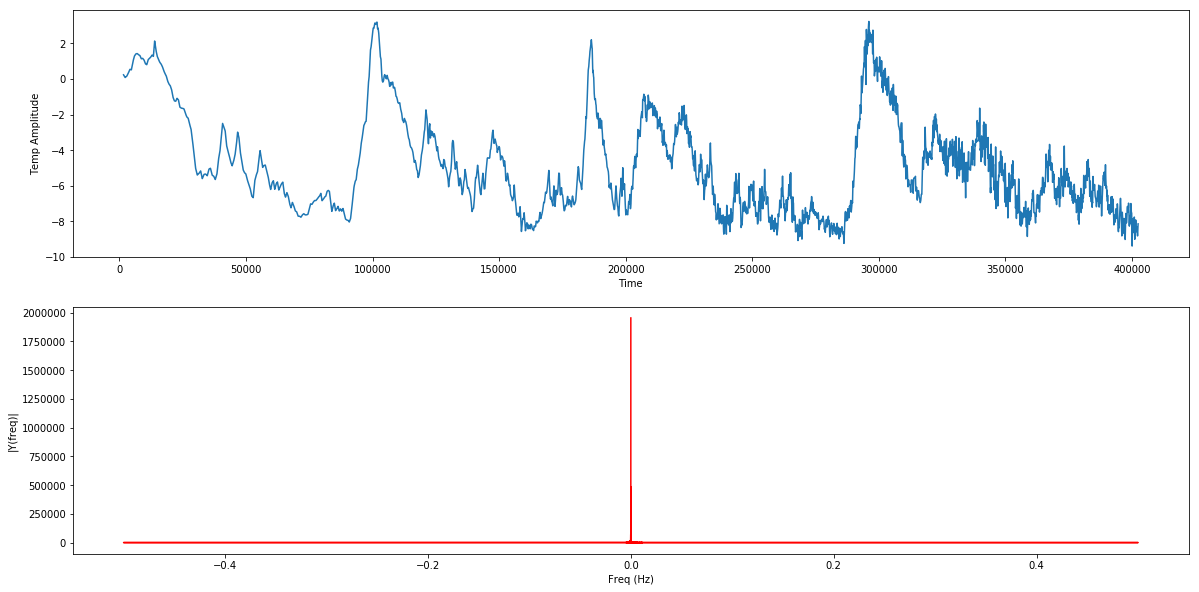

In [76]:
fig, ax = plt.subplots(2, 1, figsize=(20,10))
ax[0].plot(pre_civ_df['t'],pre_civ_df['int_temp'])
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Temp Amplitude')
ax[1].plot(temp_freq,abs(f_temp),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')

# Generating the transfer function

In [64]:
# https://dsp.stackexchange.com/questions/16937/transfer-function-determination-from-input-and-output-data

In [79]:
ghg_tf = f_temp / f_CO2

In [80]:
ghg_tf

array([-0.02150091+0.j        ,  0.07160974+0.00501856j,
       -0.01766222-0.0030883j , ...,  0.05353799-0.02512009j,
       -0.01766222+0.0030883j ,  0.07160974-0.00501856j])

In [81]:
len(ghg_tf)

400766

In [82]:
len(temp_freq)

400766

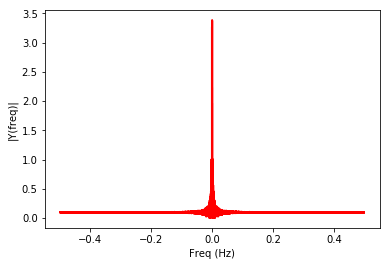

In [84]:
fig, ax = plt.subplots()
ax.plot(temp_freq,abs(ghg_tf),'r') # plotting the spectrum
ax.set_xlabel('Freq (Hz)')
ax.set_ylabel('|Y(freq)|')

In [71]:
from scipy.fftpack import ifft

In [85]:
# Ok so now given input we should be able to compute response...

In [86]:
# Let's test with a sine wave

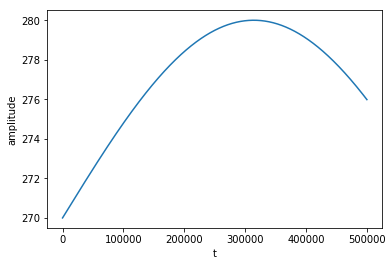

In [260]:
x = np.arange(1,500000,500000.0/400766)
y = 10* np.sin(0.000005*x) + 270
plt.plot(x, y)
plt.xlabel('t')
plt.ylabel('amplitude')
plt.show()

In [261]:
len(y)

400766

In [262]:
sine_response = ifft(ghg_tf * fft(y))

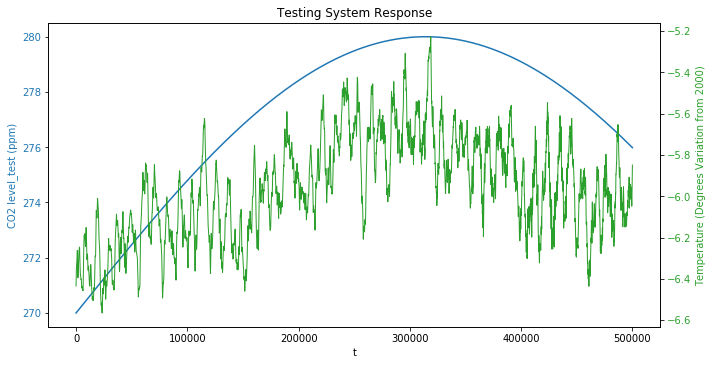

In [263]:
fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:blue'
ax1.set_xlabel('t')
ax1.set_ylabel('CO2 level_test (ppm)', color=color)
ax1.plot(x, y, color=color) 
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('Temperature (Degrees Variation from 2000)', color=color) 
ax2.plot(x, sine_response, color=color, linewidth=1) 
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Testing System Response')
plt.show()

In [ ]:
# This is problematic because it's below 0...

In [257]:
sine_response

array([-8.66323960 +0.00000000e+00j, -8.66318496 -3.06685956e-18j,
       -8.66313061 +0.00000000e+00j, ..., -8.60480242 +8.67828981e-21j,
       -8.60474844 +0.00000000e+00j, -8.60469474 -1.29016929e-19j])

In [ ]:
# One issue is we need ~400k samples in order to multiply this - can we sample the transfer function? 

In [ ]:
ghg_tf_df = pd.DataFrame(zip(temp_freq,abs(ghg_tf)), columns=['freq', 'magnitude'])

In [ ]:
ghg_tf_df.describe()

In [197]:
import seaborn as sns

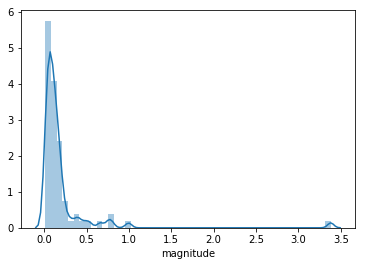

In [198]:
sns.distplot(ghg_tf_df['magnitude'])

In [201]:
sampled_tf = ghg_tf_df.sort_values(by='magnitude', ascending=False)[:100]

,freq,magnitude
47,-0.000516,3.382662
44,-0.000563,0.995541
32,0.000500,0.794102
60,-0.000313,0.755874
20,0.000313,0.661295
39,0.000609,0.534854
48,-0.000500,0.474588
57,-0.000359,0.402745
37,0.000578,0.388130
8,0.000125,0.320593


In [ ]:
x = np.arange(1,500000,500000.0/400766)
y = np.sin(0.000005*x) + 400
plt.plot(x, y)
plt.xlabel('t')
plt.ylabel('amplitude')
plt.show()

# Emissions Scenarios

In [586]:
emissions_df = pd.read_csv('Downloads/emissions.csv')

In [595]:
len(emissions_df)

83

In [587]:
emissions_df.head()

,Year,A,B,C,D,E
0,2018,408.000000,408.000000,408.000000,408.000000,408.000000
1,2019,411.386400,410.448000,408.754800,410.040000,408.204000
2,2020,414.800907,412.910688,409.510996,410.523847,408.408102
3,2021,418.243755,415.388152,410.268592,411.008265,408.612306
4,2022,421.715178,417.880481,411.027589,411.493255,408.816612


In [589]:
post_ir_df = df[df['Year'] > 1750]

In [590]:
post_ir_df.head()

,t,Year,CO2,Temperature,int_year,int_CO2,int_temp
424137,424137,1755.0,277.2,NaN,1755.0,277.20,-1.49625
424142,424142,1760.0,277.6,NaN,1760.0,277.60,-1.65250
424146,424146,1764.0,276.7,NaN,1764.0,276.70,-1.77750
424147,424147,1765.0,278.0,NaN,1765.0,278.00,-1.80875
424148,424148,1766.0,NaN,-1.84,1766.0,278.12,-1.84000


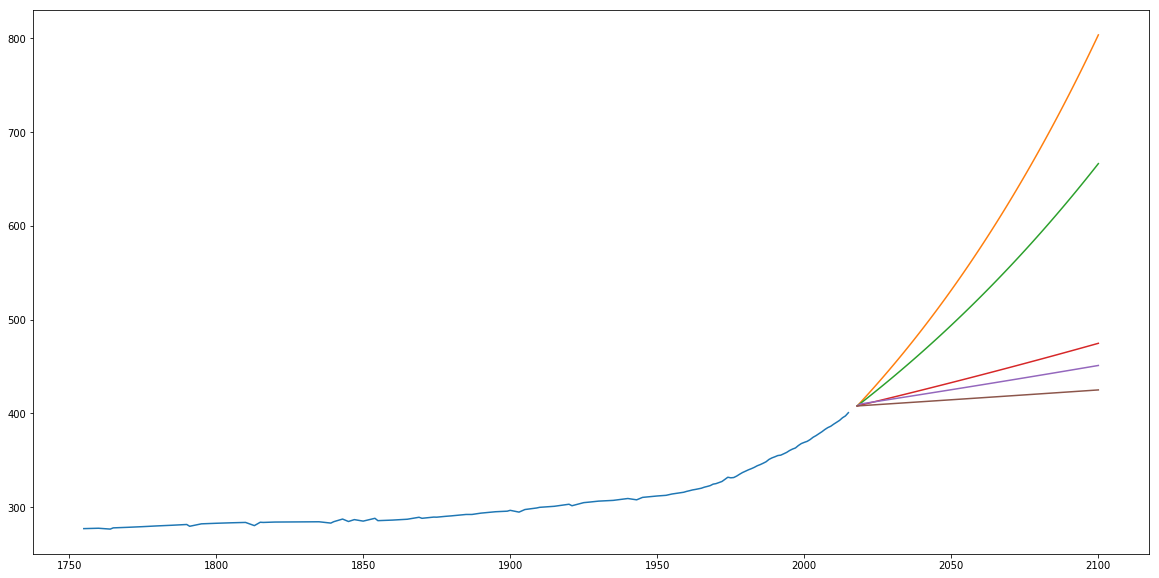

In [608]:
plt.subplots(figsize=(20,10))
plt.plot(post_ir_df['int_year'], post_ir_df['int_CO2'])
plt.plot(emissions_df['Year'], emissions_df['A'])
plt.plot(emissions_df['Year'], emissions_df['B'])
plt.plot(emissions_df['Year'], emissions_df['C'])
plt.plot(emissions_df['Year'], emissions_df['D'])
plt.plot(emissions_df['Year'], emissions_df['E'])
plt.show()


In [602]:
f_scen_a = fft(emissions_df['A'])

In [622]:
temp_response = -1 * ifft(f_scen_a * tf ) - 10

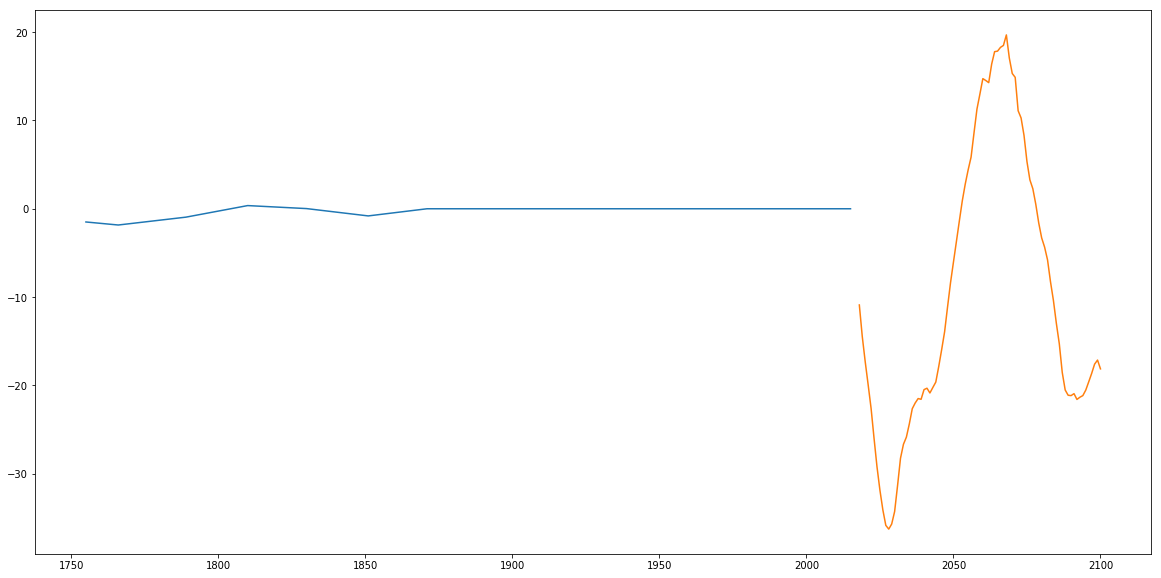

In [623]:
plt.subplots(figsize=(20,10))
plt.plot(post_ir_df['int_year'], post_ir_df['int_temp'])
plt.plot(emissions_df['Year'], temp_response)

# DATA NEED TO BE CENTERED AROUND MEAN 

In [634]:
preindustrial_df = df[df['int_year'] < 1750]

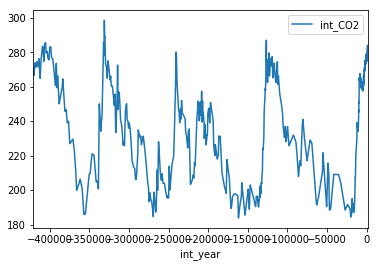

In [635]:
preindustrial_df.plot(x='int_year', y='int_CO2')

In [636]:
preindustrial_df.head()

,t,Year,CO2,Temperature,int_year,int_CO2,int_temp
1616,1616,-420766.0,NaN,0.23,-420766.0,270.425740,0.230000
1617,1617,NaN,NaN,NaN,-420765.0,270.428341,0.229762
1618,1618,NaN,NaN,NaN,-420764.0,270.430942,0.229525
1619,1619,NaN,NaN,NaN,-420763.0,270.433543,0.229287
1620,1620,NaN,NaN,NaN,-420762.0,270.436143,0.229049


In [637]:
preindustrial_df['centered_CO2'] = preindustrial_df['int_CO2'] - preindustrial_df['int_CO2'].mean()

/Users/wglad/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [645]:
preindustrial_df['int_CO2'].mean()

227.3887503079628

In [638]:
preindustrial_df['centered_temp'] = preindustrial_df['int_temp'] - preindustrial_df['int_temp'].mean()

/Users/wglad/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [646]:
preindustrial_df['int_temp'].mean()

-4.7849362391007135

In [643]:
preindustrial_df.describe()

,t,Year,CO2,Temperature,int_year,int_CO2,int_temp,centered_CO2,centered_temp
count,422516.000000,3980.000000,693.000000,3298.000000,422516.000000,422516.000000,422516.000000,4.225160e+05,4.225160e+05
mean,212873.500000,-133215.893467,248.090188,-4.540770,-209508.500000,227.388750,-4.784936,8.910432e-11,-2.953882e-13
std,121970.007505,107840.122652,31.752647,2.889253,121970.007505,27.814860,2.784591,2.781486e+01,2.784591e+00
min,1616.000000,-420766.000000,183.800000,-9.390000,-420766.000000,183.800000,-9.390000,-4.358875e+01,-4.605064e+00
25%,107244.750000,-204121.250000,223.900000,-6.900000,-315137.250000,203.383102,-6.967125,-2.400565e+01,-2.182188e+00
50%,212873.500000,-115605.000000,259.400000,-5.120000,-209508.500000,225.435295,-5.441232,-1.953455e+00,-6.562957e-01
75%,318502.250000,-41601.750000,276.700000,-2.552500,-103879.750000,247.588653,-3.158254,2.019990e+01,1.626682e+00
max,424131.000000,1745.000000,298.600000,3.230000,1749.000000,298.600000,3.230000,7.121125e+01,8.014936e+00


In [640]:
ds_preindustrial_df = preindustrial_df[preindustrial_df['int_year'] % 1000 == 0]

In [641]:
len(ds_preindustrial_df)

422

In [644]:
np.savetxt(r'ctr_ds_ghg_data.txt', ds_preindustrial_df[['centered_CO2', 'centered_temp']].values, fmt='%.5f')

In [647]:
preindustrial_df.head()

,t,Year,CO2,Temperature,int_year,int_CO2,int_temp,centered_CO2,centered_temp
1616,1616,-420766.0,NaN,0.23,-420766.0,270.425740,0.230000,43.036990,5.014936
1617,1617,NaN,NaN,NaN,-420765.0,270.428341,0.229762,43.039590,5.014699
1618,1618,NaN,NaN,NaN,-420764.0,270.430942,0.229525,43.042191,5.014461
1619,1619,NaN,NaN,NaN,-420763.0,270.433543,0.229287,43.044792,5.014223
1620,1620,NaN,NaN,NaN,-420762.0,270.436143,0.229049,43.047393,5.013985


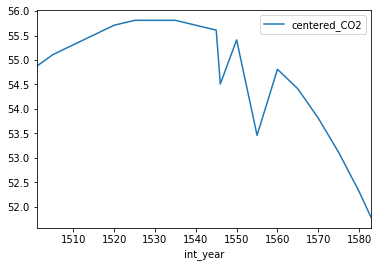

In [653]:
preindustrial_df[(preindustrial_df['int_year'] > 1500) & ((preindustrial_df['int_year'] < 1584))].plot(x='int_year', y='centered_CO2')

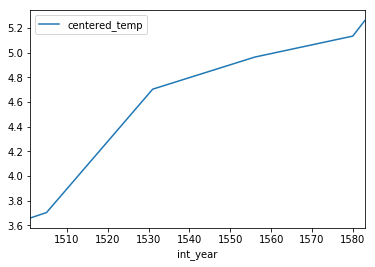

In [654]:
preindustrial_df[(preindustrial_df['int_year'] > 1500) & ((preindustrial_df['int_year'] < 1584))].plot(x='int_year', y='centered_temp')

In [656]:
df3 = pre_civ_df[(pre_civ_df['int_year'] > -200000) & (pre_civ_df['int_year'] < -150000)]

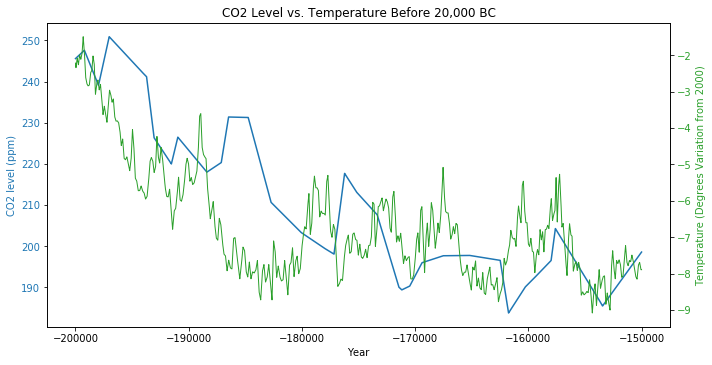

In [657]:
# Generate plot for CO2 & temperature variation over time again

fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 level (ppm)', color=color)
ax1.plot(df3['int_year'], df3['int_CO2'], color=color) 
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('Temperature (Degrees Variation from 2000)', color=color) 
ax2.plot(df3['int_year'], df3['int_temp'], color=color, linewidth=1) 
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('CO2 Level vs. Temperature Before 20,000 BC')
plt.show()

In [672]:
last_500 = df[df['int_year'] > 1015]

In [673]:
len(last_500)

1000

In [674]:
last_500['int_year']

423398    1016.0
423399    1017.0
423400    1018.0
423401    1019.0
423402    1020.0
423403    1021.0
423404    1022.0
423405    1023.0
423406    1024.0
423407    1025.0
423408    1026.0
423409    1027.0
423410    1028.0
423411    1029.0
423412    1030.0
423413    1031.0
423414    1032.0
423415    1033.0
423416    1034.0
423417    1035.0
423418    1036.0
423419    1037.0
423420    1038.0
423421    1039.0
423422    1040.0
423423    1041.0
423424    1042.0
423425    1043.0
423426    1044.0
423427    1045.0
           ...  
424368    1986.0
424369    1987.0
424370    1988.0
424371    1989.0
424372    1990.0
424373    1991.0
424374    1992.0
424375    1993.0
424376    1994.0
424377    1995.0
424378    1996.0
424379    1997.0
424380    1998.0
424381    1999.0
424382    2000.0
424383    2001.0
424384    2002.0
424385    2003.0
424386    2004.0
424387    2005.0
424388    2006.0
424389    2007.0
424390    2008.0
424391    2009.0
424392    2010.0
424393    2011.0
424394    2012.0
424395    2013

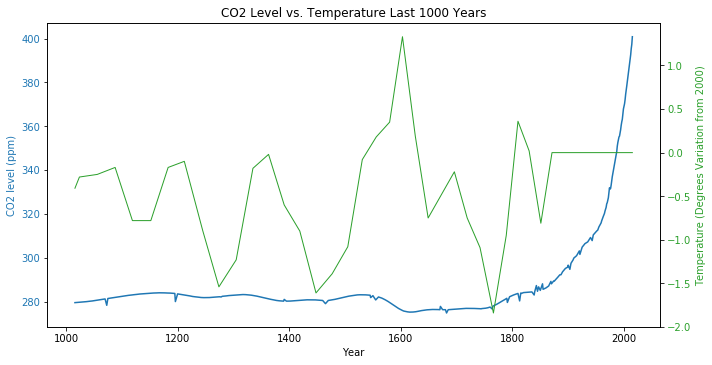

In [678]:
fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 level (ppm)', color=color)
ax1.plot(last_500['int_year'], last_500['int_CO2'], color=color) 
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('Temperature (Degrees Variation from 2000)', color=color) 
ax2.plot(last_500['int_year'], last_500['int_temp'], color=color, linewidth=1) 
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('CO2 Level vs. Temperature Last 1000 Years')
plt.show()

In [676]:
alt_df = pd.read_csv('Downloads/alt_co2_temp.txt')

In [677]:
alt_df

,mauna loa co2,date,south pole co2,heat content,date.1,+2σ heat content,-2σ heat content,date.2,-2σ temperature anomaly,temperature anomaly,+2σ temperature anomaly
0,315.71,03/01/58,314.32,-5.846154,03/20/60,-2.153846,-9.538462,11/19/60,-0.109565,-0.041739,0.036522
1,317.45,04/01/58,314.47,-4.923077,02/15/62,-1.435897,-8.205128,11/10/61,-0.036522,0.041739,0.130435
2,317.50,05/01/58,314.61,-7.282051,12/29/64,-4.000000,-10.769231,11/16/62,-0.052174,0.026087,0.099130
3,317.10,06/01/58,314.73,-8.410256,12/03/65,-5.435897,-12.000000,10/31/63,-0.036522,0.052174,0.135652
4,315.86,07/01/58,314.85,-9.538462,02/01/68,-6.666667,-12.410256,10/03/64,-0.292174,-0.208696,-0.130435
5,314.93,08/01/58,314.94,-9.128205,01/14/69,-6.358974,-11.487179,11/06/66,-0.151304,-0.067826,0.020870
6,313.20,09/01/58,315.03,-6.769231,01/18/71,-4.307692,-9.538462,11/12/67,-0.156522,-0.078261,0.005217
7,312.66,10/01/58,315.12,-6.153846,01/29/72,-3.282051,-8.512821,10/20/68,-0.177391,-0.104348,-0.026087
8,313.33,11/01/58,315.20,-4.923077,02/13/73,-2.461538,-7.282051,11/12/69,-0.046957,0.031304,0.099130
9,314.67,12/01/58,315.28,-4.512821,03/22/74,-1.948718,-6.974359,11/14/70,-0.099130,-0.031304,0.057391
